In [1]:
import sobol_seq as ss
import pandas as pd
import numpy as np
import random 
from hdmr2 import rshdmr
from pyDOE import *
import sobol_seq

***
***

 ### The Ishigami function
The Ishigami function is a benchmark function for sensitivity analysis. This nonlinear function has three inputs $\left ( X_{1},X_{2},X_{3} \right )$ uniformly distributed on $\left [ -\pi, +\pi \right ]$.

where

$$
f\left ( X_{1},X_{2},X_{3} \right )=\sin (X_{1})+a\sin ^{2}(X_{2})+bX_{3}^{4}\sin (X_{1})
$$
Typically *a=7* and *b=0.1*. 

For these parameter values, the analytical sensitivity indices are

| Index | Value |
|--|--|
| $X_{1}$ | 0.3139 |
| $X_{2}$ | 0.4424 |
| $X_{1,3}$ |0.2437  |

All other indices are identically 0


         x1        x2        x3         Y
0  0.000000  0.000000  0.000000  0.000000
1  1.570796 -1.570796  1.570796  8.608807
2 -1.570796  1.570796 -1.570796  5.391193
3 -0.785398 -0.785398  0.785398  2.765988
4  2.356194  2.356194 -2.356194  6.386470
 found a dataframe
['x1', 'x2', 'x3']
x1 : min -3.138524692014022 max 3.1385246920140215
x2 : min -3.138524692014022 max 3.1385246920140215
x3 : min -3.138524692014022 max 3.1385246920140215
train layer0 in 2.96 sec
train layer1 in 2.63 sec
train layer2 in 2.66 sec
train layer3 in 2.37 sec
train layer4 in 2.47 sec
train layer5 in 2.37 sec
train layer6 in 2.44 sec
train layer7 in 2.18 sec
train layer8 in 2.25 sec
train layer9 in 2.47 sec
train layer10 in 2.28 sec
train layer11 in 2.41 sec
train layer12 in 2.39 sec
train layer13 in 2.42 sec
train layer14 in 2.43 sec
train layer15 in 2.47 sec
train layer16 in 2.38 sec
train layer17 in 2.54 sec
train layer18 in 2.39 sec
train layer19 in 2.15 sec
train layer20 in 2.35 sec
train layer21 in 2.44

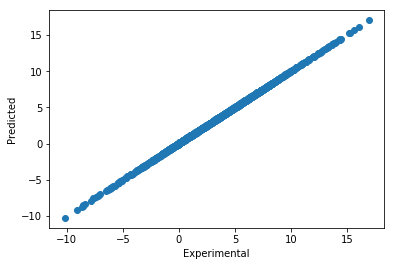

mae error on test set   : 0.024
mse error on test set   : 0.001
explained variance score: 1.000
slope     :  1.0007238030684575
r value   :  0.9999622237487887
r^2       :  0.9999244489246226
p value   :  0.0
std error :  0.00019230835227914553
 
 
sum of indexes :  0.9994134796561341
 
   index     value
0     x1  0.314538
1     x2  0.439677
2     x3  0.000000
3  x1,x2  0.000000
4  x1,x3  0.245198
5  x2,x3  0.000000


In [3]:
# Set the number of samples
samples = 2048 

#provide values for the parameters
a = 7
b = 0.1

#set a random seed for repeatability. The value used for the published results is 12345
random.seed( 12345 )
Ish_samples = sobol_seq.i4_sobol_generate(3, samples)
# Ish_samples = lhs(3, samples=samples, criterion="corr", iterations = 100)
# Ish_samples = lhs(3, samples=samples, criterion='center')
Ish = pd.DataFrame(Ish_samples)
Ish.columns = ['x1', 'x2', 'x3']

Ish.x1 = 2*np.pi * Ish.x1 - np.pi 
Ish.x2 = 2*np.pi * Ish.x2 - np.pi 
Ish.x3 = 2*np.pi * Ish.x3 - np.pi 

# define the Ishigami Function

def Ishigami(x,a,b):
    term1 = np.sin(x[0])
    term2 = a*(np.sin(x[1]))**2
    term3 = b * x[2]**4 * np.sin(x[0])
    term4 = term1 + term2 + term3
    return term4

# Add the Y value to the dataframe
Ish['Y'] = Ishigami([Ish.x1, Ish.x2, Ish.x3],a,b)

print(Ish.head())

# everything is setup, let's do the sensitivity analysis
Ishigami = rshdmr(Ish, 
              poly_order=12,
              seq_type='mode1',    
              gmdh_ref_functions = ('linear_cov'),
              regression_type = 'ard',
              hdmr_order = 2,
              admix_features = True,
              criterion_type = 'validate',
              manual_best_neurons_selection = True,
              min_best_neurons_count = 72,
              n_jobs = 4 
              )
Ishigami.auto()
Ishigami.stats()
sum_of_indexes = sum(Ishigami.sobol_indexes.value)
print(" ")
print(" ")
print("sum of indexes : ",sum_of_indexes )
print(" ")
print(Ishigami.sobol_indexes)


In [ ]:
np.var(Ish['Y'])

In [ ]:
Ishigami = rshdmr(Ish, 
              poly_order=12,
              gmdh_ref_functions = ('liner-cov'),
              regression_type = 'lassolars',
              hdmr_order = 2,
              admix_features = True,
              criterion_type = 'validate',
              manual_best_neurons_selection = True,
              min_best_neurons_count = 100
              )
Ishigami.auto()
Ishigami.stats()
sum_of_indexes = sum(Ishigami.sobol_indexes.value) 
print(" ")
print("sum of indexes : ",sum_of_indexes )
print(" ")
print(Ishigami.sobol_indexes)

***
***

 ### Sobol' g-function
The so called g-function of Sobol is used to compare Sobol indices $S_{i}$. The function is defined for *d* inputs $\left ( X_{i},...,X_{d} \right )$ uniformly distributed on $\left [ 0, 1 \right ]^{d}$.

$$
f(\mathbf{x})=\prod_{i=1}^{n}g_{i}(x_{i})
$$
where
$$
g_{i}(x_{i})=\frac{\left | 4x_{i}-2   \right |+a_{i}}{1+a_{i}}
$$

Because of its complexity (considerable nonlinear and non-monotonic relationships) and the availability of analytical sensitivity indices, it is a well known test example in the study of global sensitivity analysis algorithms.
The importance of each input $X_{i}$ is represented by the coefficient $a_{i}$. The lower the coefficient $a_{i}$, the more significant the variable $X_{i}$. 
 
 The example presented here uses 8 input parameters with coefficients from the table below. 
 
| $a_{1}$ | $a_{2}$ | $a_{3}$ | $a_{4}$ | $a_{5}$ | $a_{6}$ | $a_{7}$ | $a_{8}$ |
|--|--|--|--|--|--|--|--|
| 4.5 |4.5 |1|0|1|9|0|9

The resulting analytical first and second order indices are given below

|Index|Value  ||Index|Value  |
|--|--|--|--|--|
| x1 | 0.0096 || x3,x4 | 0.0242 |
| x2 | 0.0096 || x3,x7 | 0.0242 |
| x3 | 0.0727 || x4,x5 | 0.0242 |
| x4 | 0.2906 || x4,x7 | 0.0969 |
| x5 | 0.0727 || x5,x7 | 0.0242 |
| x6 | 0.0029 |
| x7 | 0.2906 |
| x8 | 0.0029 |

Further discussion on the g-function can be found in "Saltelli, Andrea, ed. _Sensitivity Analysis_. Paperback ed. Wiley Paperback Series. Chichester: Wiley, 2008".


 found a dataframe
['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
x1 : min 0.00048828125 max 0.99951171875
x2 : min 0.00048828125 max 0.99951171875
x3 : min 0.00048828125 max 0.99951171875
x4 : min 0.00048828125 max 0.99951171875
x5 : min 0.00048828125 max 0.99951171875
x6 : min 0.00048828125 max 0.99951171875
x7 : min 0.00048828125 max 0.99951171875
x8 : min 0.00048828125 max 0.99951171875
train layer0 in 2.70 sec
train layer1 in 8.16 sec
train layer2 in 8.81 sec
train layer3 in 8.91 sec
train layer4 in 8.99 sec
train layer5 in 8.91 sec
train layer6 in 8.97 sec
train layer7 in 8.94 sec
train layer8 in 9.44 sec
train layer9 in 9.16 sec
train layer10 in 9.19 sec
train layer11 in 10.09 sec
train layer12 in 10.06 sec
train layer13 in 9.23 sec
train layer14 in 9.38 sec
train layer15 in 9.33 sec
train layer16 in 9.63 sec
train layer17 in 9.29 sec
train layer18 in 9.86 sec
train layer19 in 10.67 sec
train layer20 in 9.82 sec
train layer21 in 11.56 sec
train layer22 in 11.02 sec
train layer

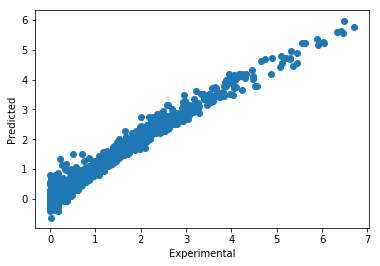

mae error on test set   : 0.132
mse error on test set   : 0.035
explained variance score: 0.968
slope     :  0.9673665882859178
r value   :  0.9842605815964172
r^2       :  0.9687688924845174
p value   :  0.0
std error :  0.0038399172797124524
 
    index     value
0      x1  0.009712
1      x2  0.012634
2      x3  0.072303
3      x4  0.290021
4      x5  0.075147
5      x6  0.002434
6      x7  0.292682
7      x8  0.002590
8   x1,x2  0.000095
9   x1,x3  0.001155
10  x1,x4  0.002977
11  x1,x5  0.001138
12  x1,x6  0.000000
13  x1,x7  0.002975
14  x1,x8  0.000000
15  x2,x3  0.000851
16  x2,x4  0.003284
17  x2,x5  0.000570
18  x2,x6  0.000000
19  x2,x7  0.003303
20  x2,x8  0.000000
21  x3,x4  0.022765
22  x3,x5  0.006151
23  x3,x6  0.000279
24  x3,x7  0.024251
25  x3,x8  0.000000
26  x4,x5  0.023199
27  x4,x6  0.001046
28  x4,x7  0.094499
29  x4,x8  0.000661
30  x5,x6  0.000106
31  x5,x7  0.023465
32  x5,x8  0.000000
33  x6,x7  0.000597
34  x6,x8  0.000000
35  x7,x8  0.000892
 
 
sum of ind

In [5]:
# Set the number of samples
samples = 2048 

#provide values for the coefficients
a_list = [4.5, 4.5, 1, 0, 1, 9, 0, 9]

#set a random seed for repeatability. The value used for the published results is 12345
random.seed( 12345 )


# SG_samples = lhs(8, samples=samples, criterion="corr", iterations = 100)

SG_samples = sobol_seq.i4_sobol_generate(8, samples)
SG = pd.DataFrame(SG_samples)
SG.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']


# define to Sobol g-function as a function of the vectors X and a

def sobol_G(x,a):
    i=0
    f = 1
    for xi in x:
        ai = a[i]
        g = (np.abs(4*xi-2) + ai) / (1+ai)
        f = f * g
        i += 1
    return f
        
# Add the Y value to the dataframe
SG['Y'] = sobol_G([SG.x1, SG.x2, SG.x3, SG.x4, SG.x5, SG.x6, SG.x7, SG.x8],a_list)

# everything is setup, let's do the sensitivity analysis 
sobol_G = rshdmr(SG, 
              poly_order=12,
              gmdh_ref_functions = ('linear_cov'),
              regression_type = 'ard',
              hdmr_order = 2,
              manual_best_neurons_selection = True,
              min_best_neurons_count = 200,
              n_jobs = 4 
              )
sobol_G.auto()
sobol_G.stats()
print(" ")
print(sobol_G.sobol_indexes)

sum_of_indexes = sum(sobol_G.sobol_indexes.value) 

print(" ")
print(" ")
print("sum of indexes : ",sum_of_indexes )
print(" ")

